In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from hyperdash import monitor_cell

%matplotlib inline

In [2]:
batch_size = 2

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

In [4]:
if (torch.cuda.is_available()):
    print("Cuda enabled")
else:
    print("Cuda disabled!")

Cuda enabled


In [5]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [6]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [7]:
classes = ['0','1','2','3','4','5','6','7','8','9']

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


    7     4


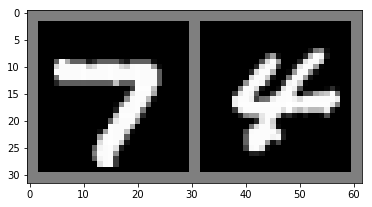

In [9]:

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [10]:
class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(1,6,5)
            self.conv2 = nn.Conv2d(6,16,5)
            self.fc1 = nn.Linear(256, 256)
            self.fc2 = nn.Linear(256, 84)
            self.fc3 = nn.Linear(84, 10)
            
        def forward(self, x): # called with `outputs = net(inputs)`
            # max pooling over a (2,2) window
            x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
            # specify one number if the size is a square (2 in this case)
            x = F.max_pool2d(F.relu(self.conv2(x)), 2)
            x = x.view(-1, self.num_flat_features(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x
        
        def num_flat_features(self, x):
            size = x.size()[1:] # all dimensions except the batch dimension
            num_features = 1
            for s in size:
                num_features *= s
            return num_features
        
net = Net()
net.cuda()


Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (256 -> 256)
  (fc2): Linear (256 -> 84)
  (fc3): Linear (84 -> 10)
)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print("done")

done


In [12]:
%%monitor_cell test_run
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        #add cuda
        inputs, labels = inputs.cuda(), labels.cuda()

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # Forward pass
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.193
[1,  4000] loss: 0.263
[1,  6000] loss: 0.168
[1,  8000] loss: 0.137
[1, 10000] loss: 0.138
[1, 12000] loss: 0.126
[1, 14000] loss: 0.105
[1, 16000] loss: 0.103
[1, 18000] loss: 0.088
[1, 20000] loss: 0.099
[1, 22000] loss: 0.078
[1, 24000] loss: 0.080
[1, 26000] loss: 0.082
[1, 28000] loss: 0.080
[1, 30000] loss: 0.080
[2,  2000] loss: 0.070
[2,  4000] loss: 0.054
[2,  6000] loss: 0.047
[2,  8000] loss: 0.066
[2, 10000] loss: 0.053
[2, 12000] loss: 0.056
[2, 14000] loss: 0.059
[2, 16000] loss: 0.055
[2, 18000] loss: 0.048
[2, 20000] loss: 0.051
[2, 22000] loss: 0.050
[2, 24000] loss: 0.057
[2, 26000] loss: 0.060
[2, 28000] loss: 0.050
[2, 30000] loss: 0.048
[3,  2000] loss: 0.046
[3,  4000] loss: 0.033
[3,  6000] loss: 0.044
[3,  8000] loss: 0.035
[3, 10000] loss: 0.036
[3, 12000] loss: 0.027
[3, 14000] loss: 0.054
[3, 16000] loss: 0.035
[3, 18000] loss: 0.032
[3, 20000] loss: 0.049
[3, 22000] loss: 0.042
[3, 24000] loss: 0.051
[3, 26000] loss: 0.034
[3, 28000] 


 7
 2
[torch.LongTensor of size 2]



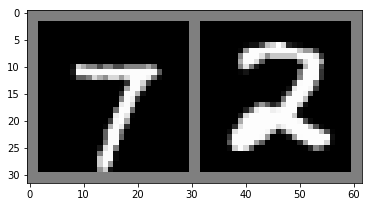

In [ ]:
dataitr = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [ ]:
outputs = net(Variable(images))

In [ ]:
vals, indexes = torch.max(outputs.data, 1)
print(indexes)

In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    conf, predicted = torch.max(outputs.data, 1)
    total += batch_size # labels.size(0) also would work
    correct += (predicted == labels).sum()
    
print('Acc on 10k test images',correct/total)